In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import glob

%matplotlib inline

In [2]:
google_trends = pd.read_csv("google_trends_master.csv")
google_trends

,Region,doge_x,white guy blinking,spongegar,i crave that mineral,moth lamp,drake,spiderman pointing,salt bae,why the fuck you lyin,...,mocking spongebob,evil kermit,arthurs fist,dat boi,grumpy cat,doge_y,distracted boyfriend,surprised pikachu,y tho,is this a pigeon
0,Alaska,100,NaN,67.0,NaN,38.0,NaN,NaN,NaN,NaN,...,35,NaN,NaN,56.0,72.0,100,NaN,NaN,NaN,NaN
1,Indiana,97,61.0,65.0,NaN,59.0,68.0,50.0,50.0,NaN,...,83,96.0,NaN,72.0,85.0,97,48.0,52.0,77.0,37.0
2,Washington,95,95.0,49.0,NaN,50.0,67.0,56.0,69.0,NaN,...,54,63.0,NaN,61.0,92.0,95,56.0,54.0,72.0,53.0
3,Iowa,94,86.0,41.0,NaN,36.0,59.0,NaN,60.0,NaN,...,69,77.0,NaN,45.0,81.0,94,71.0,40.0,NaN,20.0
4,Utah,93,33.0,59.0,NaN,49.0,62.0,100.0,55.0,NaN,...,65,66.0,NaN,66.0,95.0,93,80.0,43.0,100.0,100.0
5,Nevada,91,100.0,65.0,NaN,68.0,100.0,NaN,77.0,NaN,...,95,52.0,NaN,89.0,68.0,91,40.0,52.0,90.0,26.0
6,Nebraska,89,88.0,41.0,NaN,55.0,63.0,NaN,79.0,NaN,...,86,62.0,NaN,63.0,84.0,89,47.0,79.0,NaN,53.0
7,Oklahoma,88,47.0,59.0,NaN,55.0,70.0,NaN,49.0,NaN,...,70,73.0,NaN,54.0,83.0,88,33.0,57.0,55.0,45.0
8,Wisconsin,88,56.0,55.0,NaN,47.0,55.0,50.0,45.0,NaN,...,67,54.0,NaN,86.0,78.0,88,71.0,56.0,61.0,52.0
9,Arizona,88,84.0,62.0,NaN,52.0,82.0,58.0,60.0,NaN,...,73,75.0,NaN,56.0,76.0,88,47.0,57.0,88.0,47.0


In [3]:
master_memes = pd.read_csv("memes.csv")
master_memes

,about,image,origin,origin summary,title,year
0,"Doge is a slang term for ""dog"" that is primari...",https://i.kym-cdn.com/entries/icons/mobile/000...,Tumblr,"The use of the misspelled word ""doge"" to refer...",Doge,2013
1,Moth Lamp refers to jokes about moth insects t...,https://i.kym-cdn.com/entries/icons/mobile/000...,Reddit,"On July 14th, 2018, Redditor No_Reason27[2] po...",Moth Lamp,2018
2,"Distracted Boyfriend, also known as Man Lookin...",https://i.kym-cdn.com/entries/icons/mobile/000...,iStock,"On November 2, 2015, the source image, taken b...",Distracted Boyfriend,2017
3,"""I Crave That Mineral"" is an expression stemmi...",https://i.kym-cdn.com/entries/icons/square/000...,Tumblr,"On October 27th, 2014, Tumblr[2] user sixpence...",I Crave That Mineral,2014
4,Evil Kermit is a captioned image series featur...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"In 2014, the musical comedy film Muppets Most ...",Evil Kermit,2016
5,"Expanding Brain, also known as Galaxy Brain, i...",https://i.kym-cdn.com/entries/icons/mobile/000...,Reddit,"This meme originated as part of the ""Whomst"" m...",Expanding Brain,2017
6,Surprised Pikachu refers to a screenshot from ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Tumblr,The episode from the Pokémon anime where the i...,Surprised Pikachu,2018
7,"Mocking SpongeBob, also known as Spongemock, r...",https://i.kym-cdn.com/entries/icons/mobile/000...,SpongeBob Squarepants,The image of SpongeBob used for this series co...,Mocking SpongeBob,2017
8,"Y Tho, an abbreviation of the question ""why th...",https://i.kym-cdn.com/entries/icons/square/000...,Urban Dictionary,"The earliest definition of ""Y Tho was posted t...",Y Tho,2007
9,"SpongeGar, Caveman Spongebob and Primitive Spo...",https://i.kym-cdn.com/entries/icons/mobile/000...,4chan,"On December 31st, 1999, a primitive version of...",SpongeGar / Primitive Sponge / Caveman Spongebob,2014


In [4]:
# dropped an extra doge column that was accidentally added to the df before

google_trends = google_trends.drop(columns="doge_y")

In [7]:
# put the columns in alphabetical order to match with the other df, but one column had to be renamed to keep the order

google_trends.rename(columns={'white guy blinking':'blinking white guy'}, inplace=True)
google_trends = google_trends.reindex(sorted(google_trends.columns), axis=1)
google_trends.head()

,Region,arthurs fist,blinking white guy,confused mr krabs,dat boi,distracted boyfriend,doge_x,drake,evil kermit,expanding brain,...,i crave that mineral,is this a pigeon,mocking spongebob,moth lamp,salt bae,spiderman pointing,spongegar,surprised pikachu,why the fuck you lyin,y tho
0,Alaska,NaN,NaN,NaN,56.0,NaN,100,NaN,NaN,NaN,...,NaN,NaN,35,38.0,NaN,NaN,67.0,NaN,NaN,NaN
1,Indiana,NaN,61.0,NaN,72.0,48.0,97,68.0,96.0,79.0,...,NaN,37.0,83,59.0,50.0,50.0,65.0,52.0,NaN,77.0
2,Washington,NaN,95.0,NaN,61.0,56.0,95,67.0,63.0,71.0,...,NaN,53.0,54,50.0,69.0,56.0,49.0,54.0,NaN,72.0
3,Iowa,NaN,86.0,NaN,45.0,71.0,94,59.0,77.0,53.0,...,NaN,20.0,69,36.0,60.0,NaN,41.0,40.0,NaN,NaN
4,Utah,NaN,33.0,NaN,66.0,80.0,93,62.0,66.0,54.0,...,NaN,100.0,65,49.0,55.0,100.0,59.0,43.0,NaN,100.0


In [6]:
master_memes.sort_values(by=['title'], inplace=True)
master_memes

,about,image,origin,origin summary,title,year
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016
16,"Blinking White Guy, also known as Drew Scanlon...",https://i.kym-cdn.com/entries/icons/square/000...,Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",Blinking White Guy,2017
17,"When You Wake Up From a Nap, also known as Con...",https://i.kym-cdn.com/entries/icons/square/000...,Twitter,While the exact origin of the image is unknown...,Confused Mr. Krabs / When You Wake Up From a Nap,2016
18,Dat Boi (a colloquial pronunciation of “that b...,https://i.kym-cdn.com/entries/icons/mobile/000...,Facebook,"In July 2014, FunnyJunk[4] user tehbestever po...",Dat Boi,2016
2,"Distracted Boyfriend, also known as Man Lookin...",https://i.kym-cdn.com/entries/icons/mobile/000...,iStock,"On November 2, 2015, the source image, taken b...",Distracted Boyfriend,2017
0,"Doge is a slang term for ""dog"" that is primari...",https://i.kym-cdn.com/entries/icons/mobile/000...,Tumblr,"The use of the misspelled word ""doge"" to refer...",Doge,2013
10,Drakeposting refers to the practice of posting...,https://i.kym-cdn.com/entries/icons/mobile/000...,4chan,The original image is taken from the music vid...,Drakeposting,2015
4,Evil Kermit is a captioned image series featur...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"In 2014, the musical comedy film Muppets Most ...",Evil Kermit,2016
5,"Expanding Brain, also known as Galaxy Brain, i...",https://i.kym-cdn.com/entries/icons/mobile/000...,Reddit,"This meme originated as part of the ""Whomst"" m...",Expanding Brain,2017
11,Grumpy Cat is the nickname given to Tardar Sau...,https://i.kym-cdn.com/entries/icons/mobile/000...,Reddit,"Grumpy Cat was born in Morristown, Arizona on ...",Grumpy Cat,2012


In [9]:
# renamed the columns manually so they can match the other df values, which will result in an easier join later on

google_trends.rename(columns={
    "arthurs fist":"Arthur's Fist",
    "blinking white guy":"Blinking White Guy",
    "confused mr krabs":"Confused Mr. Krabs / When You Wake Up From a Nap",
    "dat boi":"Dat Boi",
    "distracted boyfriend":"Distracted Boyfriend",
    "doge_x":"Doge",
    "drake":"Drakeposting",
    "evil kermit":"Evil Kermit",
    "expanding brain":"Expanding Brain",
    "grumpy cat":"Grumpy Cat",
    "i crave that mineral":"I Crave That Mineral",
    "is this a pigeon":"Is This a Pigeon?",
    "mocking spongebob":"Mocking SpongeBob",
    "moth lamp":"Moth Lamp",
    "salt bae":"Salt Bae",
    "spiderman pointing":"Spider-Man Pointing at Spider-Man",
    "spongegar":"SpongeGar / Primitive Sponge / Caveman Spongebob",
    "surprised pikachu":"Surprised Pikachu",
    "why the fuck you lyin":"Why The Fuck You Lyin'",
    "y tho":"Y Tho"

}, inplace=True)

google_trends

,Region,Arthur's Fist,Blinking White Guy,Confused Mr. Krabs / When You Wake Up From a Nap,Dat Boi,Distracted Boyfriend,Doge,Drakeposting,Evil Kermit,Expanding Brain,...,I Crave That Mineral,Is This a Pigeon?,Mocking SpongeBob,Moth Lamp,Salt Bae,Spider-Man Pointing at Spider-Man,SpongeGar / Primitive Sponge / Caveman Spongebob,Surprised Pikachu,Why The Fuck You Lyin',Y Tho
0,Alaska,NaN,NaN,NaN,56.0,NaN,100,NaN,NaN,NaN,...,NaN,NaN,35,38.0,NaN,NaN,67.0,NaN,NaN,NaN
1,Indiana,NaN,61.0,NaN,72.0,48.0,97,68.0,96.0,79.0,...,NaN,37.0,83,59.0,50.0,50.0,65.0,52.0,NaN,77.0
2,Washington,NaN,95.0,NaN,61.0,56.0,95,67.0,63.0,71.0,...,NaN,53.0,54,50.0,69.0,56.0,49.0,54.0,NaN,72.0
3,Iowa,NaN,86.0,NaN,45.0,71.0,94,59.0,77.0,53.0,...,NaN,20.0,69,36.0,60.0,NaN,41.0,40.0,NaN,NaN
4,Utah,NaN,33.0,NaN,66.0,80.0,93,62.0,66.0,54.0,...,NaN,100.0,65,49.0,55.0,100.0,59.0,43.0,NaN,100.0
5,Nevada,NaN,100.0,NaN,89.0,40.0,91,100.0,52.0,100.0,...,NaN,26.0,95,68.0,77.0,NaN,65.0,52.0,NaN,90.0
6,Nebraska,NaN,88.0,NaN,63.0,47.0,89,63.0,62.0,NaN,...,NaN,53.0,86,55.0,79.0,NaN,41.0,79.0,NaN,NaN
7,Oklahoma,NaN,47.0,NaN,54.0,33.0,88,70.0,73.0,44.0,...,NaN,45.0,70,55.0,49.0,NaN,59.0,57.0,NaN,55.0
8,Wisconsin,NaN,56.0,NaN,86.0,71.0,88,55.0,54.0,72.0,...,NaN,52.0,67,47.0,45.0,50.0,55.0,56.0,NaN,61.0
9,Arizona,NaN,84.0,NaN,56.0,47.0,88,82.0,75.0,71.0,...,NaN,47.0,73,52.0,60.0,58.0,62.0,57.0,NaN,88.0


In [23]:
# used the melt function to flip the df 90 degrees

reshaped_df = google_trends.melt(id_vars=['Region'], var_name='title', value_name='popularity')
reshaped_df

,Region,title,popularity
0,Alaska,Arthur's Fist,NaN
1,Indiana,Arthur's Fist,NaN
2,Washington,Arthur's Fist,NaN
3,Iowa,Arthur's Fist,NaN
4,Utah,Arthur's Fist,NaN
5,Nevada,Arthur's Fist,NaN
6,Nebraska,Arthur's Fist,NaN
7,Oklahoma,Arthur's Fist,NaN
8,Wisconsin,Arthur's Fist,NaN
9,Arizona,Arthur's Fist,NaN


In [44]:
# finally combining everything!

final_meme_df = master_memes.join(reshaped_df.set_index('title'), on='title', how='left')
final_meme_df

,about,image,origin,origin summary,title,year,Region,popularity
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Alaska,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Indiana,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Washington,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Iowa,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Utah,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Nevada,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Nebraska,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Oklahoma,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Wisconsin,NaN
12,Arthur's Fist is a reaction image featuring a ...,https://i.kym-cdn.com/entries/icons/mobile/000...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arthur's Fist,2016,Arizona,NaN


In [46]:
# just reordering the column names

final_meme_df = final_meme_df[['title', 'year', 'about', 'origin', 'origin summary', 'Region', 'popularity', 'image']]
final_meme_df

,title,year,about,origin,origin summary,Region,popularity,image
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Alaska,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Indiana,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Washington,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Iowa,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Utah,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Nevada,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Nebraska,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Oklahoma,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Wisconsin,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Arizona,NaN,https://i.kym-cdn.com/entries/icons/mobile/000...


In [98]:
# aggregation 1 - just New York

final_meme_df[final_meme_df.Region == 'New York'].sort_values(by='popularity', ascending=False)

,title,year,about,origin,origin summary,Region,popularity,image
3,I Crave That Mineral,2014,"""I Crave That Mineral"" is an expression stemmi...",Tumblr,"On October 27th, 2014, Tumblr[2] user sixpence...",New York,100.0,https://i.kym-cdn.com/entries/icons/square/000...
17,Confused Mr. Krabs / When You Wake Up From a Nap,2016,"When You Wake Up From a Nap, also known as Con...",Twitter,While the exact origin of the image is unknown...,New York,100.0,https://i.kym-cdn.com/entries/icons/square/000...
10,Drakeposting,2015,Drakeposting refers to the practice of posting...,4chan,The original image is taken from the music vid...,New York,93.0,https://i.kym-cdn.com/entries/icons/mobile/000...
16,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",New York,79.0,https://i.kym-cdn.com/entries/icons/square/000...
4,Evil Kermit,2016,Evil Kermit is a captioned image series featur...,Twitter,"In 2014, the musical comedy film Muppets Most ...",New York,76.0,https://i.kym-cdn.com/entries/icons/mobile/000...
5,Expanding Brain,2017,"Expanding Brain, also known as Galaxy Brain, i...",Reddit,"This meme originated as part of the ""Whomst"" m...",New York,72.0,https://i.kym-cdn.com/entries/icons/mobile/000...
0,Doge,2013,"Doge is a slang term for ""dog"" that is primari...",Tumblr,"The use of the misspelled word ""doge"" to refer...",New York,66.0,https://i.kym-cdn.com/entries/icons/mobile/000...
13,Salt Bae,2017,Salt Bae is a nickname given to Turkish chef N...,Twitter,"On January 7th, 2017, Gökçe uploaded a video o...",New York,61.0,https://i.kym-cdn.com/entries/icons/mobile/000...
11,Grumpy Cat,2012,Grumpy Cat is the nickname given to Tardar Sau...,Reddit,"Grumpy Cat was born in Morristown, Arizona on ...",New York,60.0,https://i.kym-cdn.com/entries/icons/mobile/000...
8,Y Tho,2007,"Y Tho, an abbreviation of the question ""why th...",Urban Dictionary,"The earliest definition of ""Y Tho was posted t...",New York,59.0,https://i.kym-cdn.com/entries/icons/square/000...


In [97]:
# aggregation 2 - popularity column

final_meme_df.popularity.value_counts().sort_values(ascending=False).head(10)

100.0    21
56.0     19
47.0     18
55.0     18
58.0     18
74.0     17
49.0     16
63.0     16
72.0     16
73.0     15
Name: popularity, dtype: int64

In [65]:
final_meme_df.popularity.mean()

62.28142857142857

In [83]:
final_meme_df[final_meme_df.popularity>=90].sort_values(by='popularity', ascending=False)

,title,year,about,origin,origin summary,Region,popularity,image
12,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Texas,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
1,Moth Lamp,2018,Moth Lamp refers to jokes about moth insects t...,Reddit,"On July 14th, 2018, Redditor No_Reason27[2] po...",Delaware,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
10,Drakeposting,2015,Drakeposting refers to the practice of posting...,4chan,The original image is taken from the music vid...,Nevada,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
5,Expanding Brain,2017,"Expanding Brain, also known as Galaxy Brain, i...",Reddit,"This meme originated as part of the ""Whomst"" m...",Nevada,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
11,Grumpy Cat,2012,Grumpy Cat is the nickname given to Tardar Sau...,Reddit,"Grumpy Cat was born in Morristown, Arizona on ...",West Virginia,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
3,I Crave That Mineral,2014,"""I Crave That Mineral"" is an expression stemmi...",Tumblr,"On October 27th, 2014, Tumblr[2] user sixpence...",New York,100.0,https://i.kym-cdn.com/entries/icons/square/000...
15,Is This a Pigeon?,1991,"""Is this a pigeon?"" is a memorable quote said ...",The Brave Fighter of Sun Fighbird / 太陽の勇者ファイバード,"The still shot originates from Season 1, Episo...",Utah,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
7,Mocking SpongeBob,2017,"Mocking SpongeBob, also known as Spongemock, r...",SpongeBob Squarepants,The image of SpongeBob used for this series co...,West Virginia,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
0,Doge,2013,"Doge is a slang term for ""dog"" that is primari...",Tumblr,"The use of the misspelled word ""doge"" to refer...",Alaska,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...
7,Mocking SpongeBob,2017,"Mocking SpongeBob, also known as Spongemock, r...",SpongeBob Squarepants,The image of SpongeBob used for this series co...,Delaware,100.0,https://i.kym-cdn.com/entries/icons/mobile/000...


In [67]:
# aggregation 3 - origin 

final_meme_df.origin.value_counts() / 51

Twitter                                            4.0
Tumblr                                             3.0
Reddit                                             3.0
4chan                                              2.0
The Brave Fighter of Sun Fighbird / 太陽の勇者ファイバード    1.0
SpongeBob Squarepants                              1.0
Sharenator                                         1.0
Facebook                                           1.0
Drew Scanlon                                       1.0
Urban Dictionary                                   1.0
iStock                                             1.0
Vine                                               1.0
Name: origin, dtype: float64

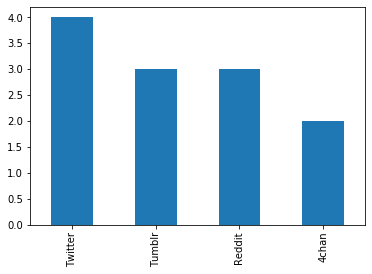

In [101]:
chart = final_meme_df.origin.value_counts().head(4) / 51

chart.plot(kind = 'bar')

In [90]:
# aggregation 4 - how popular the memes are in each state

final_meme_df.groupby(by='Region').popularity.mean().sort_values(ascending=False)

Region
North Dakota            84.166667
Delaware                81.000000
Nevada                  74.200000
Rhode Island            74.083333
West Virginia           71.000000
Utah                    70.000000
Michigan                69.437500
Texas                   69.157895
Wyoming                 69.000000
Nebraska                68.384615
New Mexico              68.083333
California              68.050000
Indiana                 67.437500
Arizona                 67.250000
Maryland                67.125000
Pennsylvania            66.937500
Connecticut             66.625000
Washington              66.062500
Maine                   65.454545
Kentucky                62.666667
South Carolina          62.187500
Wisconsin               62.062500
Ohio                    62.000000
Illinois                61.687500
New York                61.611111
New Jersey              61.562500
Massachusetts           61.562500
Arkansas                61.500000
Montana                 61.400000
Alaska 

In [94]:
# aggregation 5 - top 10 most popular memes from the list

final_meme_df.groupby(by='title').popularity.mean().sort_values(ascending=False).head(10)

title
I Crave That Mineral      93.000000
Why The Fuck You Lyin'    88.000000
Doge                      77.352941
Grumpy Cat                76.480000
Arthur's Fist             73.500000
Blinking White Guy        72.857143
Evil Kermit               70.711111
Drakeposting              68.644444
Y Tho                     67.322581
Mocking SpongeBob         66.960784
Name: popularity, dtype: float64

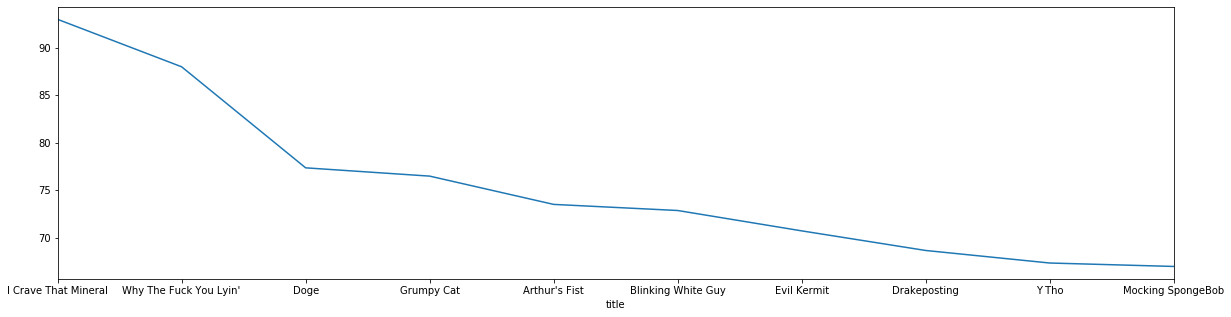

In [147]:
final_meme_df.groupby(by='title').popularity.mean().sort_values(ascending=False).head(10).plot(figsize=(20,5))

In [117]:
# aggregation 6 - most popular year

final_meme_df.year.value_counts() / 51

2017    5.0
2016    4.0
2018    2.0
2015    2.0
2014    2.0
2013    1.0
2012    1.0
2011    1.0
2007    1.0
1991    1.0
Name: year, dtype: float64

In [188]:
# just some code that does stuff i guess 

final_meme_df.popularity.fillna(0, inplace=True)
final_meme_df['popularity'] = final_meme_df.popularity.astype(int)

In [213]:
new_df = final_meme_df.groupby(['Region'], sort=False)['popularity'].max()
new_df = pd.DataFrame(new_df)

In [211]:
new_df1 = final_meme_df.groupby(['title'], sort=False)['popularity'].max()
new_df1 = pd.DataFrame(new_df1)

In [217]:
# aggregation 7 - most popular state per meme

pop_state_per_meme = final_meme_df.merge(new_df1, on=['title','popularity'])
pop_state_per_meme 

,title,year,about,origin,origin summary,Region,popularity,image
0,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Texas,100,https://i.kym-cdn.com/entries/icons/mobile/000...
1,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",Nevada,100,https://i.kym-cdn.com/entries/icons/square/000...
2,Confused Mr. Krabs / When You Wake Up From a Nap,2016,"When You Wake Up From a Nap, also known as Con...",Twitter,While the exact origin of the image is unknown...,New York,100,https://i.kym-cdn.com/entries/icons/square/000...
3,Dat Boi,2016,Dat Boi (a colloquial pronunciation of “that b...,Facebook,"In July 2014, FunnyJunk[4] user tehbestever po...",North Dakota,100,https://i.kym-cdn.com/entries/icons/mobile/000...
4,Distracted Boyfriend,2017,"Distracted Boyfriend, also known as Man Lookin...",iStock,"On November 2, 2015, the source image, taken b...",Connecticut,100,https://i.kym-cdn.com/entries/icons/mobile/000...
5,Doge,2013,"Doge is a slang term for ""dog"" that is primari...",Tumblr,"The use of the misspelled word ""doge"" to refer...",Alaska,100,https://i.kym-cdn.com/entries/icons/mobile/000...
6,Drakeposting,2015,Drakeposting refers to the practice of posting...,4chan,The original image is taken from the music vid...,Nevada,100,https://i.kym-cdn.com/entries/icons/mobile/000...
7,Evil Kermit,2016,Evil Kermit is a captioned image series featur...,Twitter,"In 2014, the musical comedy film Muppets Most ...",Pennsylvania,100,https://i.kym-cdn.com/entries/icons/mobile/000...
8,Expanding Brain,2017,"Expanding Brain, also known as Galaxy Brain, i...",Reddit,"This meme originated as part of the ""Whomst"" m...",Nevada,100,https://i.kym-cdn.com/entries/icons/mobile/000...
9,Grumpy Cat,2012,Grumpy Cat is the nickname given to Tardar Sau...,Reddit,"Grumpy Cat was born in Morristown, Arizona on ...",West Virginia,100,https://i.kym-cdn.com/entries/icons/mobile/000...


In [216]:
# aggregation 8 - most popular meme(s) per state
# this is what i'm going to map :) 

pop_meme_per_state = final_meme_df.merge(new_df, on=['Region','popularity'])
pop_meme_per_state

,title,year,about,origin,origin summary,Region,popularity,image
0,Arthur's Fist,2016,Arthur's Fist is a reaction image featuring a ...,Twitter,"On September 6th, 1999, Episode 1 Season 4 of ...",Texas,100,https://i.kym-cdn.com/entries/icons/mobile/000...
1,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",Washington,95,https://i.kym-cdn.com/entries/icons/square/000...
2,Doge,2013,"Doge is a slang term for ""dog"" that is primari...",Tumblr,"The use of the misspelled word ""doge"" to refer...",Washington,95,https://i.kym-cdn.com/entries/icons/mobile/000...
3,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",Nevada,100,https://i.kym-cdn.com/entries/icons/square/000...
4,Drakeposting,2015,Drakeposting refers to the practice of posting...,4chan,The original image is taken from the music vid...,Nevada,100,https://i.kym-cdn.com/entries/icons/mobile/000...
5,Expanding Brain,2017,"Expanding Brain, also known as Galaxy Brain, i...",Reddit,"This meme originated as part of the ""Whomst"" m...",Nevada,100,https://i.kym-cdn.com/entries/icons/mobile/000...
6,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",New Jersey,87,https://i.kym-cdn.com/entries/icons/square/000...
7,Drakeposting,2015,Drakeposting refers to the practice of posting...,4chan,The original image is taken from the music vid...,New Jersey,87,https://i.kym-cdn.com/entries/icons/mobile/000...
8,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",Tennessee,94,https://i.kym-cdn.com/entries/icons/square/000...
9,Blinking White Guy,2017,"Blinking White Guy, also known as Drew Scanlon...",Drew Scanlon,"The GIF comes from the GiantBomb video ""Unprof...",Virginia,77,https://i.kym-cdn.com/entries/icons/square/000...


In [221]:
#pop_meme_per_state.to_csv("pop_meme_per_state.csv", index=False)